<a href="https://colab.research.google.com/github/pb-roshith/Electricity-Production-Forecasting-using-SARIMAX/blob/main/Electricity_Production_Forecasting_using_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Electric_Production.csv')

In [3]:
df.shape

(397, 2)

In [4]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   IPG2211A2N  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [8]:
df.set_index('DATE', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [10]:
df.sort_index(inplace=True)

In [11]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


<Axes: xlabel='DATE'>

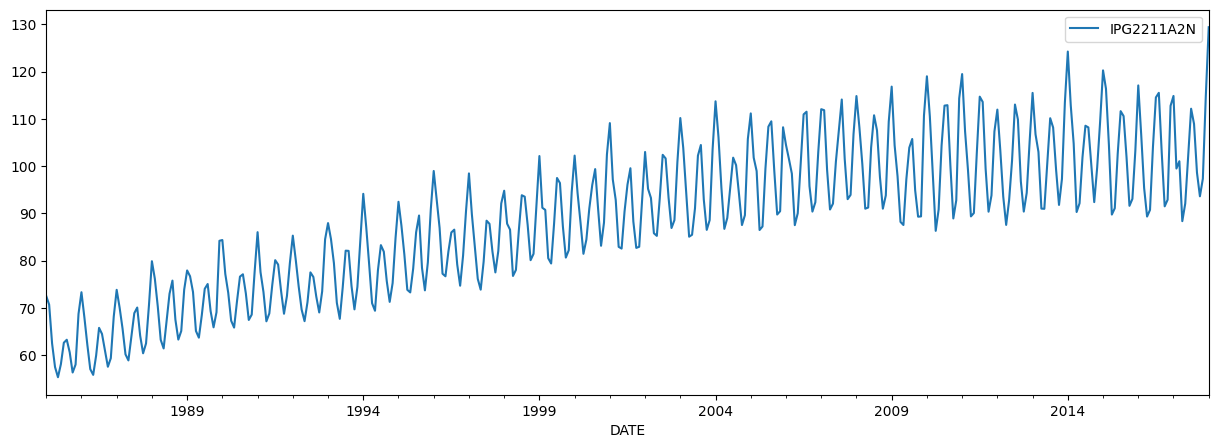

In [12]:
df.plot(figsize=(15,5))

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def adf_test(data):
  result = adfuller(data)
  print(f'ADF statistic : {result[0]}')
  print(f'P-value : {result[1]}')
  if result[1] <= 0.05:
    print('Reject null hypothesis - Data is Stationary')
  else:
    print('Accept null hypothesis - Data is not Stationary')

In [15]:
adf_test(df.values)

ADF statistic : -2.256990350047235
P-value : 0.1862146911658712
Accept null hypothesis - Data is not Stationary


In [16]:
df['order_12'] = df['IPG2211A2N'] - df['IPG2211A2N'].shift(12)

In [17]:
df.head()

,IPG2211A2N,order_12
DATE,,
1985-01-01,72.5052,NaN
1985-02-01,70.6720,NaN
1985-03-01,62.4502,NaN
1985-04-01,57.4714,NaN
1985-05-01,55.3151,NaN


In [18]:
df.tail()

,IPG2211A2N,order_12
DATE,,
2017-09-01,98.6154,-4.1483
2017-10-01,93.6137,2.1270
2017-11-01,97.3359,4.4459
2017-12-01,114.7212,1.9518
2018-01-01,129.4048,14.5543


In [19]:
adf_test(df['order_12'].dropna())

ADF statistic : -5.673482023381762
P-value : 8.812644938088861e-07
Reject null hypothesis - Data is Stationary


<Axes: xlabel='DATE'>

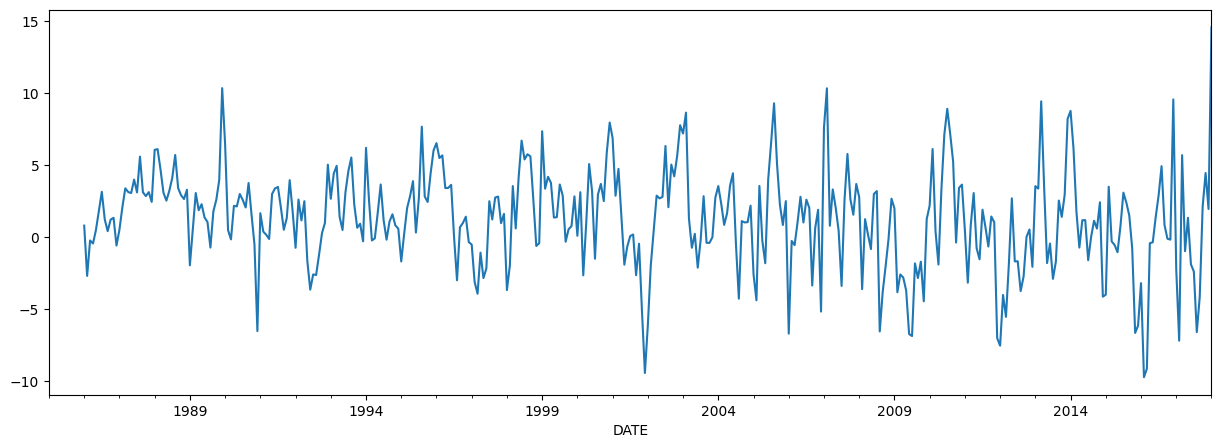

In [20]:
df['order_12'].plot(figsize=(15,5))

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

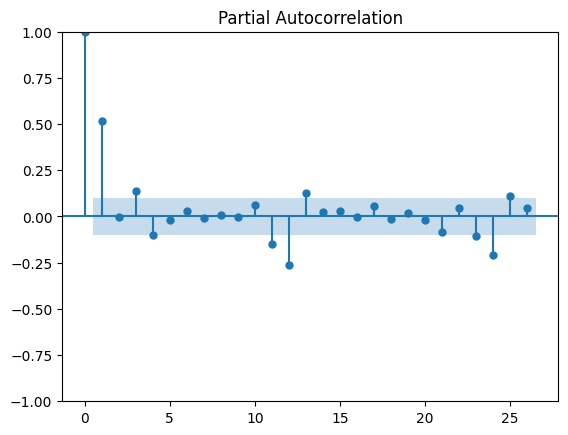

In [22]:
pacf = plot_pacf(df['order_12'].dropna()) # p = 1

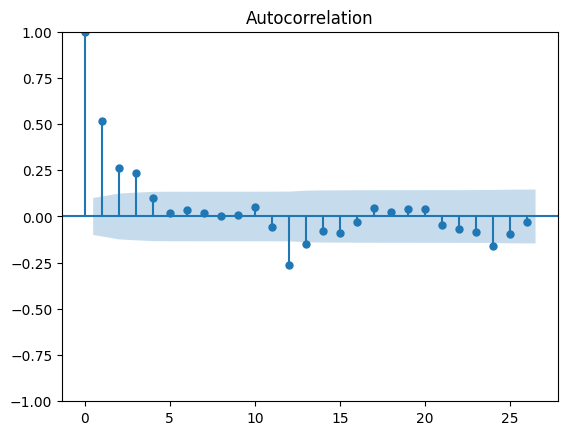

In [23]:
acf = plot_acf(df['order_12'].dropna()) # q = 2 or 3

In [24]:
train = df[:315]
test = df[315:]

In [25]:
!pip uninstall -y numpy pmdarima

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5


In [26]:
!pip install numpy==1.23.5
!pip install pmdarima --no-cache-dir

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 r

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.3 MB/s eta 0:00:00


In [27]:
from pmdarima import auto_arima

In [28]:
stepwise_fit = auto_arima(train['IPG2211A2N'], seasonal=True, m=12)

In [29]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  315
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -670.152
Date:                              Sun, 25 May 2025   AIC                           1352.305
Time:                                      07:29:16   BIC                           1374.587
Sample:                                  01-01-1985   HQIC                          1361.219
                                       - 03-01-2011                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1186      0.069      1.727      0.084      -0.016       0.253
ar.L1          0.9261      0.043     21.416      0.000       0.841       1.011
ma.L1         -0.3378      0.081     -4.191      0.000      -0.496      -0.180
ma.L2         -0.3408      0.068     -5.029      0.000      -0.474      -0.208
ma.S.L12      -0.6980      0.048    -14.540      0.000      -0.792      -0.604
sigma2         4.7536      0.288     16.526      0.000       4.190       5.317
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                57.62
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               2.51   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
model = SARIMAX(train['IPG2211A2N'], order=stepwise_fit.order, seasonal_order=stepwise_fit.seasonal_order)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
fitted_model = model.fit(disp=False)

In [33]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           IPG2211A2N   No. Observations:                  315
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -673.350
Date:                              Sun, 25 May 2025   AIC                           1356.700
Time:                                      07:39:27   BIC                           1375.268
Sample:                                  01-01-1985   HQIC                          1364.129
                                       - 03-01-2011                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9981      0.003    345.456      0.000       0.992       1.004
ma.L1         -0.4184      0.054     -7.788      0.000      -0.524      -0.313
ma.L2         -0.4203      0.054     -7.728      0.000      -0.527      -0.314
ma.S.L12      -0.7184      0.046    -15.744      0.000      -0.808      -0.629
sigma2         4.8285      0.301     16.028      0.000       4.238       5.419
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                46.43
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               2.42   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
pred = fitted_model.predict(start=test.index[0], end=test.index[-1])

In [39]:
test['sarimax_pred'] = pred

In [40]:
test.head()

,IPG2211A2N,order_12,sarimax_pred
DATE,,,
2011-04-01,89.3583,3.0583,90.159344
2011-05-01,90.0698,-0.7666,92.056606
2011-06-01,102.8204,-1.5334,102.981227
2011-07-01,114.7068,1.9002,110.711950
2011-08-01,113.5958,0.6944,111.491756


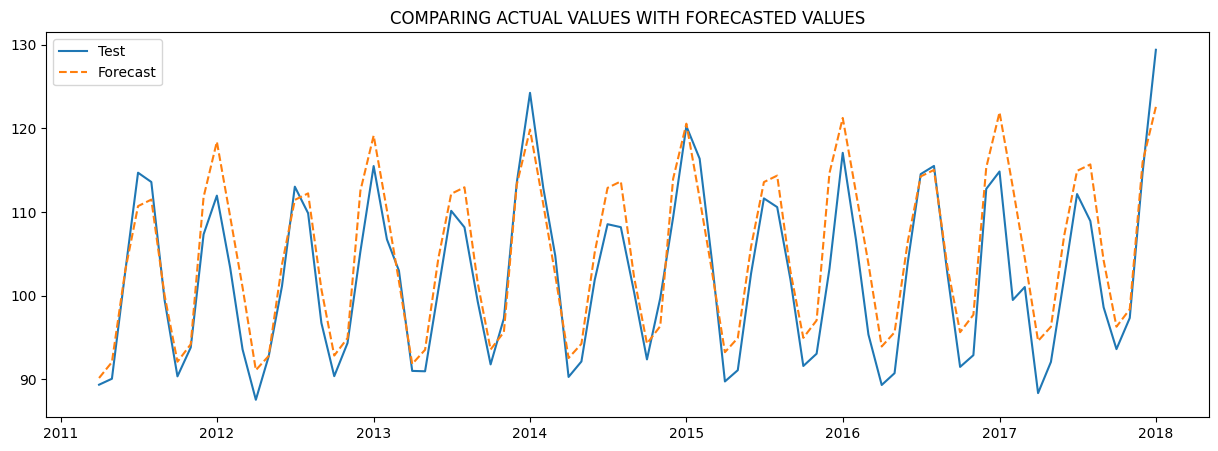

In [42]:
plt.figure(figsize=(15, 5))
plt.plot(test.index, test['IPG2211A2N'], label='Test')
plt.plot(test.index, test['sarimax_pred'], label='Forecast', linestyle='--')
plt.title('COMPARING ACTUAL VALUES WITH FORECASTED VALUES');
plt.legend()